In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

# PLASTICA

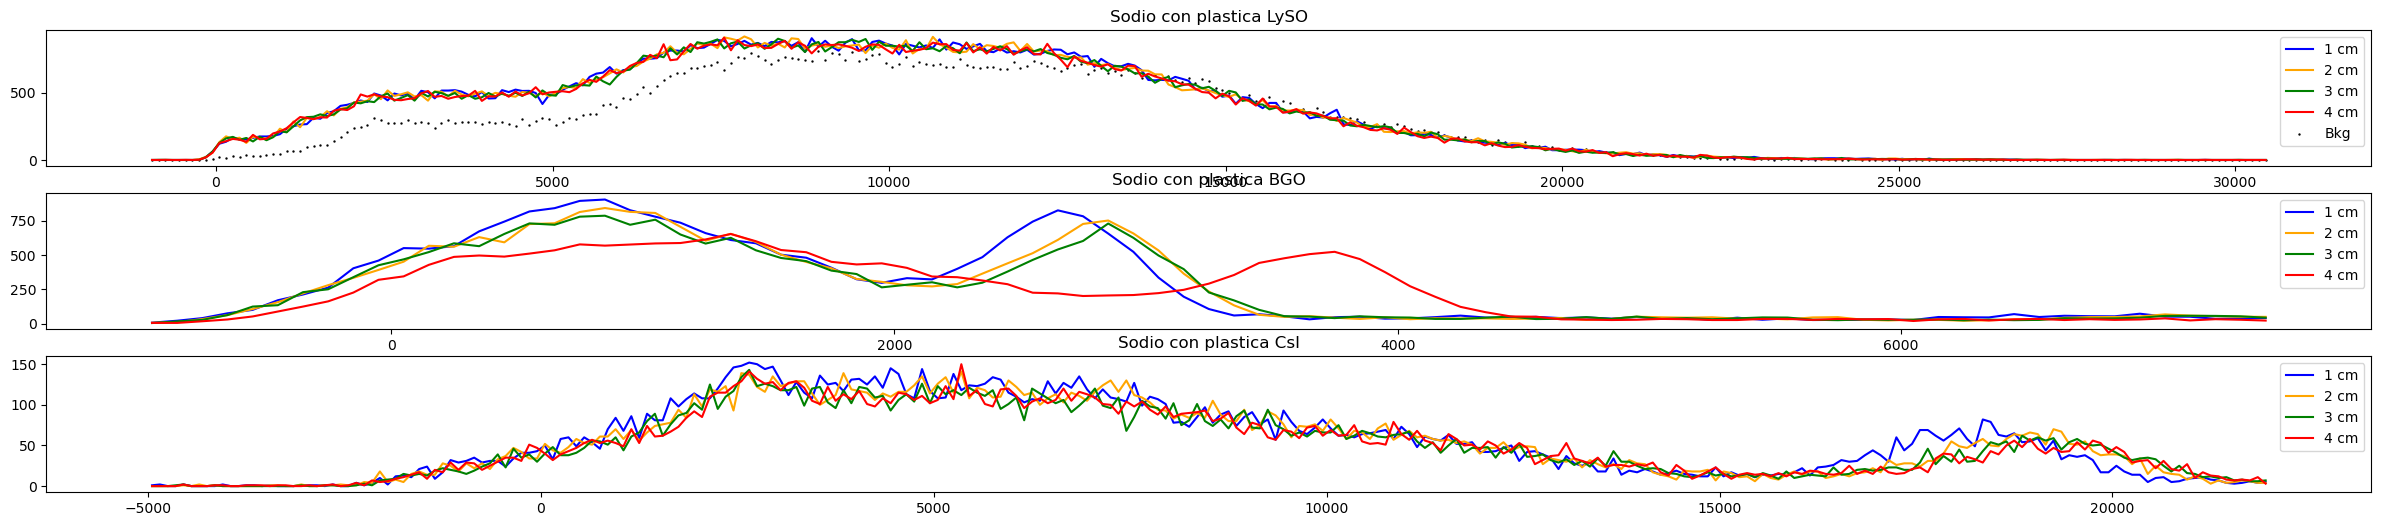

In [69]:
#prendo dati di LySO e fondo lyso
#spiego nome: sodio_lyso_1cm_plastica
Na_L_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
bkg_L  = read_corretto(path = 'Dati/Parte 2/LySO/Bkg_55.5V.txt', titles = ['ADC', 'Counts'])
#prendo dati BGO
Na_B_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
#prendo dati con CsI
Na_C_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_1.txt', titles = ['ADC', 'Counts'])
Na_C_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_2.txt', titles = ['ADC', 'Counts'])
Na_C_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_3.txt', titles = ['ADC', 'Counts'])
Na_C_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_4.txt', titles = ['ADC', 'Counts'])
#farò dei plot, non plotto tutti gli zeri finali però
Fig, axes = plt.subplots(3, 1, figsize = (30, 6))
start_index = 0
end_index_L = 380 - 65
end_index_B = 150 - 65
end_index_C = 335 - 65
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_p['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_p['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_p['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_p['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], bkg_L['Counts'][start_index:end_index_L], label = 'Bkg', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')
axes[2].set_title('Sodio con plastica CsI')
axes[2].plot(Na_C_1_p['ADC'][start_index:end_index_C], Na_C_1_p['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[2].plot(Na_C_2_p['ADC'][start_index:end_index_C], Na_C_2_p['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[2].plot(Na_C_3_p['ADC'][start_index:end_index_C], Na_C_3_p['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[2].plot(Na_C_4_p['ADC'][start_index:end_index_C], Na_C_4_p['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[2].legend()

## LySO

In [ ]:
#non si vede una mazza con LySO, probabilmente è colpa del fondo, ora provo a toglierlo. e riplotto.
Na_L_1_nobkg_p = Na_L_1_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_p = Na_L_2_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_p = Na_L_3_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_p = Na_L_4_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
a = np.zeros(len(Na_L_1_nobkg_p))
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_nobkg_p, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_nobkg_p, label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_nobkg_p, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_nobkg_p, label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], a, label = '0', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO senza fondo')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')

#non si capisce comunque una mazza col LySO

## BGO

In [77]:
#1cm
start_index = 96 - 65
end_index_B = 109 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_1_p['Counts'][start_index:end_index_B])), gauss, mu = 3000, sigma = 400, S = 400)#, a = 50)

S1 = vals[1]
mu1 = vals[0]
#2cm
start_index = 95 - 65
end_index_B = 115 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_2_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 700, a = 0, b = 0, c = 0 )
s2 = vals[1]
mu2 = vals[0]
#3cm
start_index = 97 - 65
end_index_B = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B],
                                   np.array(np.sqrt(Na_B_3_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 800, a = 0, b = 0, c = 0)
s3 = vals[1]
mu3 = vals[0]
#4 cm
start_index = 90 - 65
end_index_B = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_4_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 800, a = 0, b = 0, c = 0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 36.19 (χ²/ndof = 3.6)      │              Nfcn = 158              │
│ EDM = 5.7e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.632e3  │  0.005e3  │            │            │         │         │       │
│ 1 │ sigma │    318    │     5     │            │            │         │         │       │
│ 2 │ S     │    800    │    14     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     S │
├───────┼───────────────────┤
│    mu │    27   -11    15 │
│ sigma │   -11  21.8   -40 │
│     S │    15   -40   181 │
└───────┴───────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.36 (χ²/ndof = 1.3)      │              Nfcn = 405              │
│ EDM = 5.2e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.823e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    269    │     8     │            │            │         │         │       │
│ 2 │ S     │    644    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.34e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -0.72   │   0.09    │            │            │         │         │       │
│ 5 │ c     │ 0.100e-3  │ 0.015e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          45.8           -20             0           300        -0.175   25.00621e-6 │
│ sigma │           -20          68.9            20           390        -0.356   66.32647e-6 │
│     S │             0            20           270        0.79e3        -0.649  115.94643e-6 │
│     a │           300           390        0.79e3       1.5e+04       -10.701 1.77264709e-3 │
│     b │        -0.175        -0.356        -0.649       -10.701        0.0078   -1.30978e-6 │
│     c │   25.00621e-6   66.32647e-6  115.94643e-6 1.77264709e-3   -1.30978e-6      2.22e-10 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.77 (χ²/ndof = 1.7)      │              Nfcn = 379              │
│ EDM = 2.88e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.853e3  │  0.009e3  │            │            │         │         │       │
│ 1 │ sigma │    259    │     9     │            │            │         │         │       │
│ 2 │ S     │    549    │    15     │            │            │         │         │       │
│ 3 │ a     │  1.02e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -0.48   │   0.06    │            │            │         │         │       │
│ 5 │ c     │   59e-6   │   9e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         79.7          -40          -30          700       -0.359  45.66954e-6 │
│ sigma │          -40         83.6           10         -490        0.200 -19.39373e-6 │
│     S │          -30           10          232      -0.46e3        0.185 -17.35181e-6 │
│     a │          700         -490      -0.46e3     1.32e+04       -7.105 950.90110e-6 │
│     b │       -0.359        0.200        0.185       -7.105      0.00395   -542.80e-9 │
│     c │  45.66954e-6 -19.39373e-6 -17.35181e-6 950.90110e-6   -542.80e-9     7.62e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 35.63 (χ²/ndof = 1.0)      │              Nfcn = 473              │
│ EDM = 1.39e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.699e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    304    │     8     │            │            │         │         │       │
│ 2 │ S     │    435    │    11     │            │            │         │         │       │
│ 3 │ a     │  1.070e3  │  0.028e3  │            │            │         │         │       │
│ 4 │ b     │  -0.427   │   0.016   │            │            │         │         │       │
│ 5 │ c     │  43.6e-6  │  2.2e-6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         55.1          -10            0           20     -7.41e-3   664.551e-9 │
│ sigma │          -10           65          -30           90    -63.49e-3  8.968072e-6 │
│     S │            0          -30          126       0.05e3    -33.89e-3  4.827744e-6 │
│     a │           20           90       0.05e3          760   -441.51e-3 57.330879e-6 │
│     b │     -7.41e-3    -63.49e-3    -33.89e-3   -441.51e-3     0.000268   -35.587e-9 │
│     c │   664.551e-9  8.968072e-6  4.827744e-6 57.330879e-6   -35.587e-9     4.78e-12 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

## CsI

# Alluminio

Text(0.5, 1.0, 'Sodio con alluminio CsI')

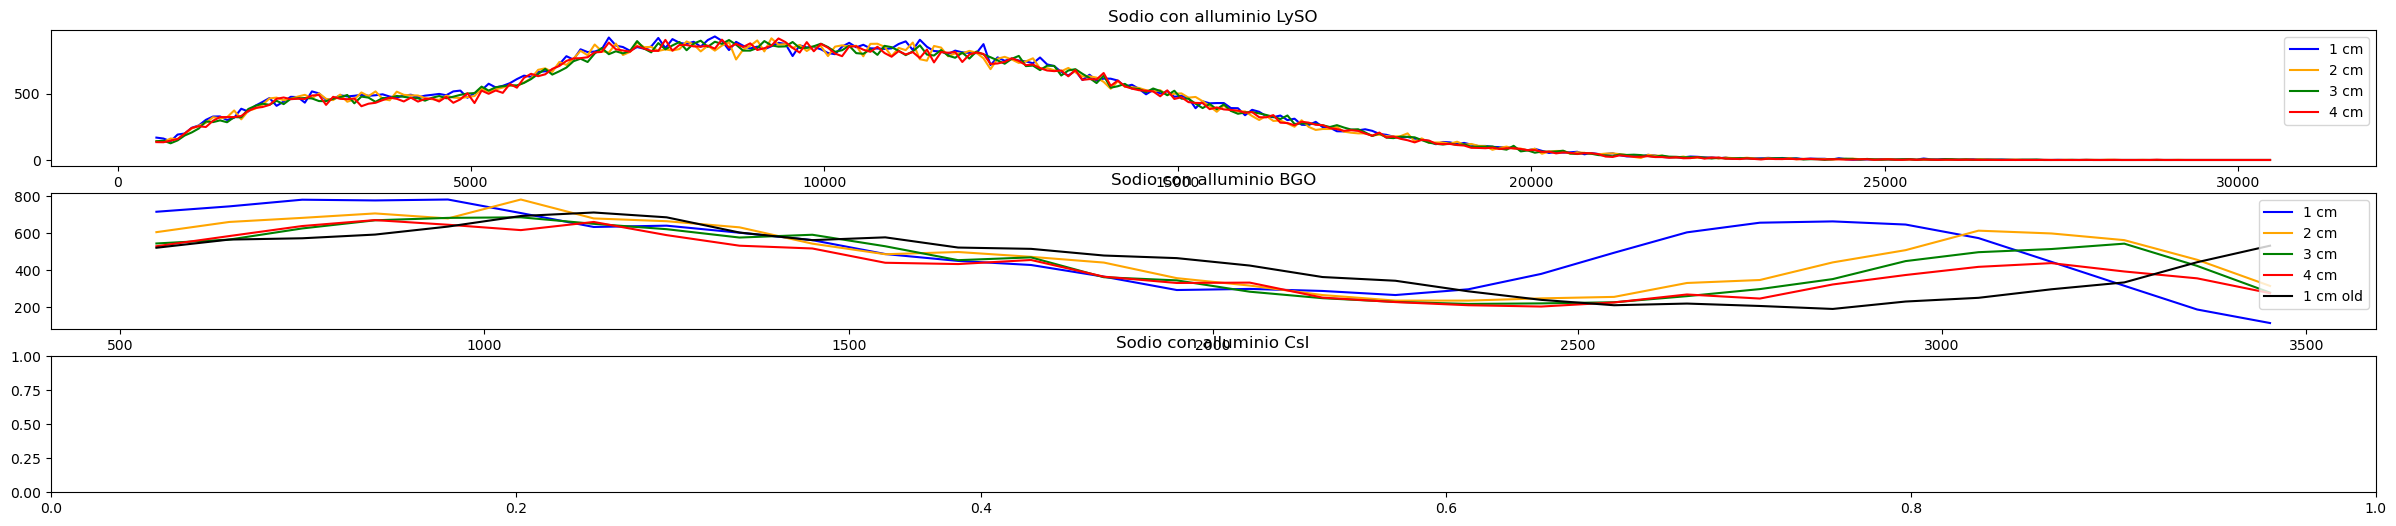

In [72]:
#spiego nome: sodio_lyso_1cm_alluminio
#LySO
Na_L_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
#BGO
Na_B_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
Na_B_1_al_old = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_1(old).txt', titles = ['ADC', 'Counts'])
#CsI
# Na_C_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_1.txt', titles = ['ADC', 'Counts'])
# Na_C_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_2.txt', titles = ['ADC', 'Counts'])
# Na_C_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_3.txt', titles = ['ADC', 'Counts'])
# Na_C_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_4.txt', titles = ['ADC', 'Counts'])
Fig, axes = plt.subplots(3, 1, figsize = (30, 6))
end_index_L = 380-65
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_al['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_al['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_al['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_al['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO')
axes[1].plot(Na_B_1_al['ADC'][start_index:end_index_B], Na_B_1_al['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_al['ADC'][start_index:end_index_B], Na_B_2_al['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_al['ADC'][start_index:end_index_B], Na_B_3_al['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_al['ADC'][start_index:end_index_B], Na_B_4_al['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].plot(Na_B_1_al_old['ADC'][start_index:end_index_B], Na_B_1_al_old['Counts'][start_index:end_index_B], label = '1 cm old', color = 'black')
axes[1].legend()
axes[1].set_title('Sodio con alluminio BGO')
axes[2].set_title('Sodio con alluminio CsI')
# axes[2].plot(Na_C_1_al['ADC'][start_index:end_index_C], Na_C_1_al['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
# axes[2].plot(Na_C_2_al['ADC'][start_index:end_index_C], Na_C_2_al['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
# axes[2].plot(Na_C_3_al['ADC'][start_index:end_index_C], Na_C_3_al['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
# axes[2].plot(Na_C_4_al['ADC'][start_index:end_index_C], Na_C_4_al['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
# axes[2].legend()

Text(0.5, 1.0, 'Sodio con alluminio LySO senza fondo')

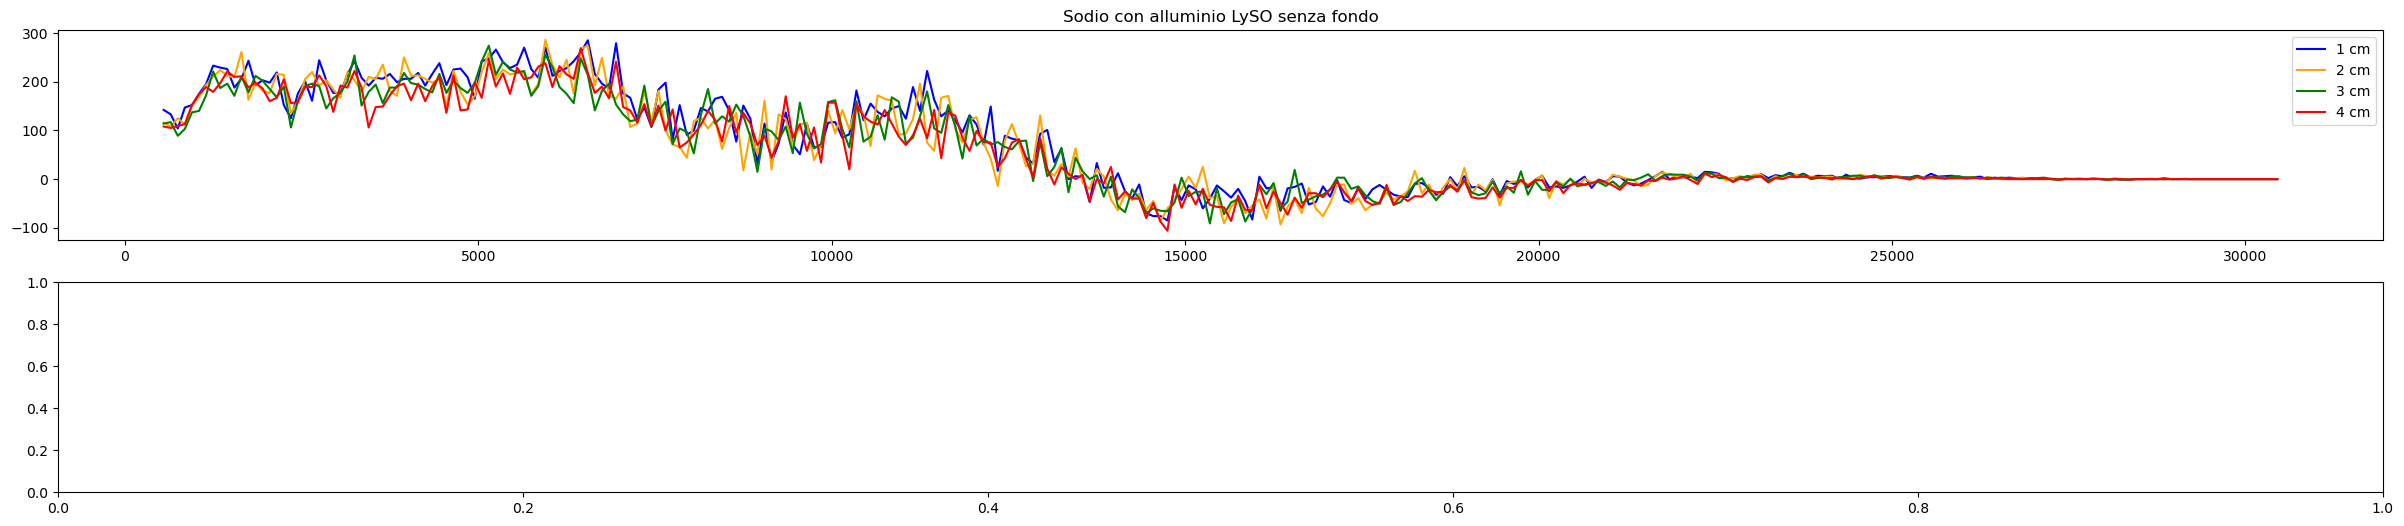

In [73]:
#tolgo sempre il fondo a lyso
Na_L_1_nobkg_al = Na_L_1_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_al = Na_L_2_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_al = Na_L_3_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_al = Na_L_4_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_nobkg_al, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_nobkg_al, label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_nobkg_al, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_nobkg_al, label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO senza fondo')
#pure questo fa schifo!

## fit BGO

In [74]:
si1 = 99 - 65
ei1 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_al['ADC'][si1 : ei1], Na_B_1_al['Counts'][si1 : ei1], np.array(np.sqrt(Na_B_1_al['Counts'][si1 : ei1])),
                                   gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu1 = vals[0]
sig1 = vals[1]
a1 = vals[2]
er_sig1 = errs[1]
er_a1 = errs[2]

si2 = 94 - 65
ei2 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_al['ADC'][si2 : ei2], Na_B_2_al['Counts'][si2 : ei2], np.array(np.sqrt(Na_B_2_al['Counts'][si2 : ei2])),
                                      gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu2 = vals[0]
sig2 = vals[1]
a2 = vals[2]
er_sig2 = errs[1]
er_a2 = errs[2]

si3 = 97 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_al['ADC'][si3 : ei], Na_B_3_al['Counts'][si3 : ei], np.array(np.sqrt(Na_B_3_al['Counts'][si3 : ei])),
                                      gauss_pol3, mu = 4000, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu3 = vals[0]  
sig3 = vals[1]
a3 = vals[2]
er_sig3 = errs[1]
er_a3 = errs[2]

si4 = 96 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_al['ADC'][si4 : ei], Na_B_4_al['Counts'][si4 : ei], np.array(np.sqrt(Na_B_4_al['Counts'][si4 : ei])),
                                      gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu4 = vals[0]
sig4 = vals[1]
a4 = vals[2]
er_sig4 = errs[1]
er_a4 = errs[2]

print(mu1, mu2, mu3, mu4)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 19.09 (χ²/ndof = 1.0)      │              Nfcn = 544              │
│ EDM = 2.31e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.864e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    285    │     7     │            │            │         │         │       │
│ 2 │ S     │    593    │    14     │            │            │         │         │       │
│ 3 │ a     │  1.879e3  │  0.015e3  │            │            │         │         │       │
│ 4 │ b     │  -1.293   │   0.005   │            │            │         │         │       │
│ 5 │ c     │ 302.1e-6  │  1.1e-6   │            │            │         │         │       │
│ 6 │ d     │ -23.43e-9 │  0.18e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                 mu              sigma                  S                  a                  b                  c                  d │
├───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │               46.5                -20                 10                 10          -2.807e-3       -469.0737e-9   95.273420594e-12 │
│ sigma │                -20               44.7                -30                -30           1.643e-3        871.3213e-9   62.276531128e-12 │
│     S │                 10                -30                183            -0.05e3           5.647e-3       1.5783970e-6 -101.907004728e-12 │
│     a │                 10                -30            -0.05e3                225         -56.210e-3      -3.8375849e-6  1.124360105742e-9 │
│     b │          -2.807e-3           1.643e-3           5.647e-3         -56.210e-3           2.43e-05         -1.6870e-9    -201.663578e-15 │
│     c │       -469.0737e-9        871.3213e-9       1.5783970e-6      -3.8375849e-6         -1.6870e-9           1.29e-12       -158.411e-18 │
│     d │   95.273420594e-12   62.276531128e-12 -101.907004728e-12  1.124360105742e-9    -201.663578e-15       -158.411e-18           3.29e-20 │
└───────┴──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.92 (χ²/ndof = 1.5)      │              Nfcn = 585              │
│ EDM = 8.71e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.111e3  │  0.006e3  │            │            │         │         │       │
│ 1 │ sigma │    268    │     6     │            │            │         │         │       │
│ 2 │ S     │    526    │    13     │            │            │         │         │       │
│ 3 │ a     │  1.573e3  │  0.012e3  │            │            │         │         │       │
│ 4 │ b     │  -0.967   │   0.005   │            │            │         │         │       │
│ 5 │ c     │ 200.4e-6  │  1.0e-6   │            │            │         │         │       │
│ 6 │ d     │ -13.68e-9 │  0.17e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              42.1               -20                10                20         -2.215e-3      -532.8606e-9  57.023183439e-12 │
│ sigma │               -20              40.8               -30               -20         -1.217e-3       412.0145e-9  155.55550894e-12 │
│     S │                10               -30               163           -0.01e3         -0.915e-3       269.5773e-9  82.744441478e-12 │
│     a │                20               -20           -0.01e3               132        -39.372e-3     -1.0700377e-6 725.427692726e-12 │
│     b │         -2.215e-3         -1.217e-3         -0.915e-3        -39.372e-3          2.06e-05        -1.8611e-9   -167.530262e-15 │
│     c │      -532.8606e-9       412.0145e-9       269.5773e-9     -1.0700377e-6        -1.8611e-9          1.07e-12      -132.756e-18 │
│     d │  57.023183439e-12  155.55550894e-12  82.744441478e-12 725.427692726e-12   -167.530262e-15      -132.756e-18          2.97e-20 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 41.77 (χ²/ndof = 1.6)      │              Nfcn = 695              │
│ EDM = 2.76e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.139e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    254    │     7     │            │            │         │         │       │
│ 2 │ S     │    452    │    12     │            │            │         │         │       │
│ 3 │ a     │  1.410e3  │  0.011e3  │            │            │         │         │       │
│ 4 │ b     │  -0.843   │   0.004   │            │            │         │         │       │
│ 5 │ c     │ 170.7e-6  │  0.8e-6   │            │            │         │         │       │
│ 6 │ d     │ -11.43e-9 │  0.11e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              48.4               -20                10                10         -2.664e-3      -449.6903e-9  72.828341750e-12 │
│ sigma │               -20              44.4               -40               -20          1.569e-3       585.7797e-9   6.922150135e-12 │
│     S │                10               -40               150           -0.01e3          0.784e-3       329.0432e-9  -6.103268084e-12 │
│     a │                10               -20           -0.01e3               115        -30.564e-3     -1.2044109e-6 527.282166204e-12 │
│     b │         -2.664e-3          1.569e-3          0.784e-3        -30.564e-3          1.33e-05        -1.0330e-9    -79.543886e-15 │
│     c │      -449.6903e-9       585.7797e-9       329.0432e-9     -1.2044109e-6        -1.0330e-9          6.04e-13       -69.035e-18 │
│     d │  72.828341750e-12   6.922150135e-12  -6.103268084e-12 527.282166204e-12    -79.543886e-15       -69.035e-18          1.29e-20 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.95 (χ²/ndof = 1.3)      │              Nfcn = 651              │
│ EDM = 6.39e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.141e3  │  0.009e3  │            │            │         │         │       │
│ 1 │ sigma │    268    │     8     │            │            │         │         │       │
│ 2 │ S     │    346    │    11     │            │            │         │         │       │
│ 3 │ a     │  1.19e3   │  0.01e3   │            │            │         │         │       │
│ 4 │ b     │  -0.6762  │  0.0034   │            │            │         │         │       │
│ 5 │ c     │ 130.9e-6  │  0.7e-6   │            │            │         │         │       │
│ 6 │ d     │ -8.44e-9  │  0.10e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              74.9               -30                10                20         -3.078e-3      -505.8213e-9  82.282967170e-12 │
│ sigma │               -30              68.8               -40               -30          1.473e-3       637.7675e-9  22.108921507e-12 │
│     S │                10               -40               117               -10          0.637e-3       319.6665e-9   2.377457998e-12 │
│     a │                20               -30               -10                98        -26.027e-3      -933.2655e-9 430.876628046e-12 │
│     b │         -3.078e-3          1.473e-3          0.637e-3        -26.027e-3          1.15e-05        -910.3e-12    -67.939510e-15 │
│     c │      -505.8213e-9       637.7675e-9       319.6665e-9      -933.2655e-9        -910.3e-12          5.12e-13       -57.929e-18 │
│     d │  82.282967170e-12  22.108921507e-12   2.377457998e-12 430.876628046e-12    -67.939510e-15       -57.929e-18           1.1e-20 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

2863.5717546046026 3111.113761275154 3139.3682779321007 3141.018772327328


In [75]:
def prop_err_mol(a, b, sa, sb):
    return np.sqrt(sa**2 * b**2 + sb**2 * a**2) 
def exp(x, a, b, ):
    return a * np.exp(-b * x) 

In [76]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
                                            [prop_err_mol(a1, sig1, er_a1, er_sig1),
                                             prop_err_mol(a2, sig2, er_a2, er_sig2),
                                             prop_err_mol(a3, sig3, er_a3, er_sig3),
                                             prop_err_mol(a4, sig4, er_a4, er_sig4) ],
                                             exp, a = 1, b = 0.1)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.231 (χ²/ndof = 0.1)      │              Nfcn = 359              │
│ EDM = 3.75e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   208e3   │    9e3    │            │            │         │         │       │
│ 1 │ b    │   0.199   │   0.017   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  7.65e+07 132.03488 │
│ b │ 132.03488   0.00028 │
└───┴─────────────────────┘